**For my initial steps into the ML and Kaggle world, what better way to begin than with the one and only Titanic dataset.**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.isnull().sum()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#Drop Cabin (too many missing values), PassengerId, Name and Ticket
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test_data = test_data.drop(['Ticket','Cabin'],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


****Survival Chances based on Gender****

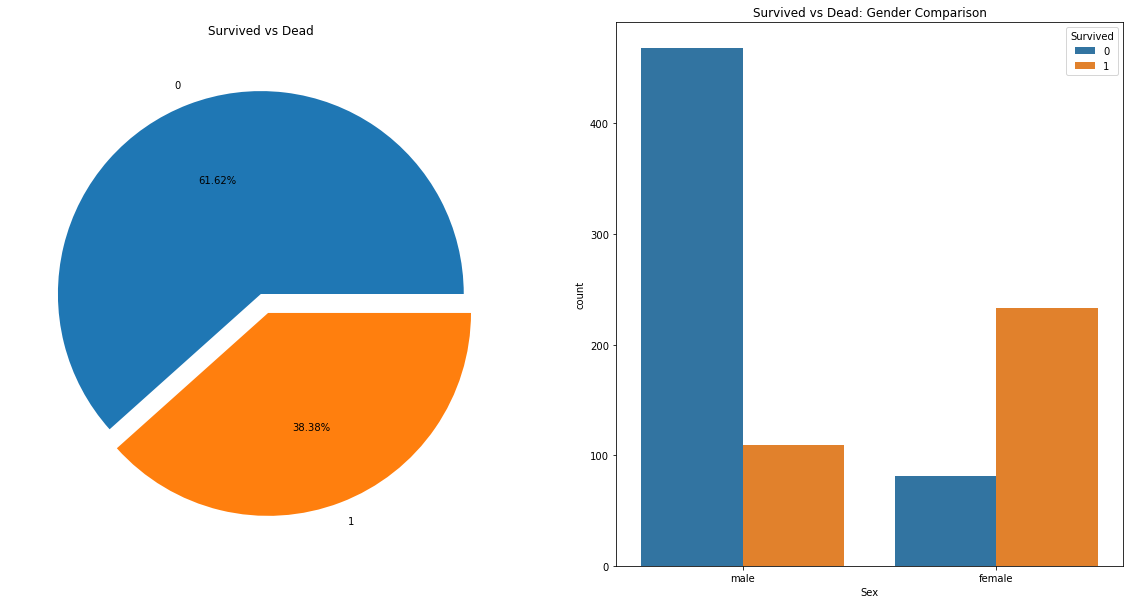

In [7]:
fig,a=plt.subplots(1,2,figsize=(20,10))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%.2f%%',ax=a[0])
a[0].set_title('Survived vs Dead')
a[0].set_ylabel('')
sns.countplot('Sex',hue='Survived',data=train_data,ax=a[1])
a[1].set_title('Survived vs Dead: Gender Comparison')
plt.show()

Less than 40% of passengers (from the training set) survived. From the survivors, it seems that nearly 2/3 were women.

Lets calculate the survival rate between the two genders

In [8]:
female_survivors = train_data.loc[train_data.Sex == 'female']['Survived']

#Sum only includes survivors since non survivors marked as 0
female_survival_rate = (sum(female_survivors)/len(female_survivors))*100
print("Female Survivor rate (%):", female_survival_rate)

male_survivors = train_data.loc[train_data.Sex == 'male']['Survived']

#Sum only includes survivors since non survivors marked as 0
male_survival_rate = (sum(male_survivors)/len(male_survivors))*100
print("Male Survivor rate (%):", male_survival_rate)

Female Survivor rate (%): 74.20382165605095
Male Survivor rate (%): 18.890814558058924


Gender seems to be a strong indicator of survival

**Measuring the role of Ticket Class (Pclass) in survival chances**

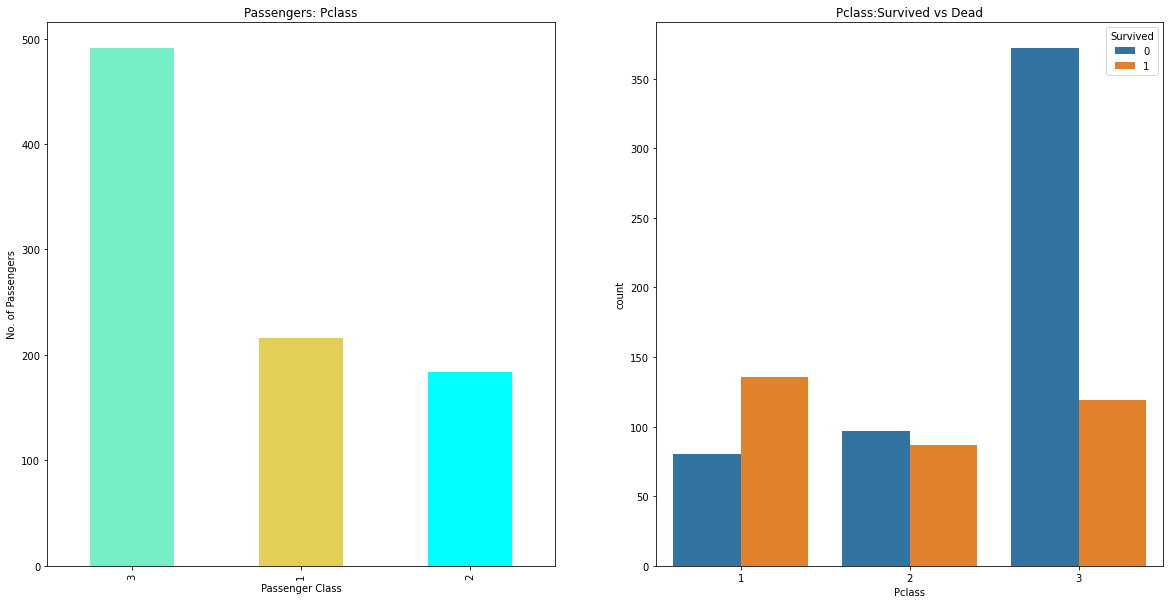

In [9]:
fig,a=plt.subplots(1,2,figsize=(20,10))
train_data['Pclass'].value_counts().plot.bar(color=['#76EEC6','#E3CF57','#00FFFF'],ax=a[0])
a[0].set_title('Passengers: Pclass')
a[0].set_xlabel('Passenger Class')
a[0].set_ylabel('No. of Passengers')
sns.countplot('Pclass',hue='Survived',data=train_data,ax=a[1])
a[1].set_title('Pclass:Survived vs Dead')
plt.show()

Despite the number of passengers in Pclass 3 being a lot higher (more than 2x) than 2 or 1, there were roughly the same number of survivors. It would be quite fair to assume that survival priveliges came at a price.

Sometimes...money can buy everything =/

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


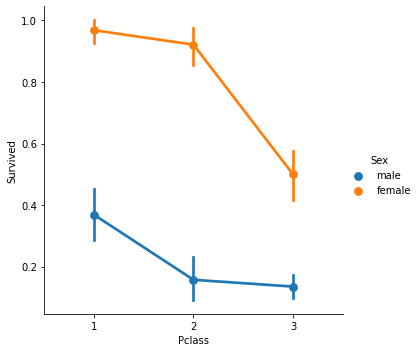

In [10]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_data)
plt.show()

The factorplot shows us:

- Almost all the women in Pclass 1 survived. The women in Pclas 2 enjoyed almost the same survival rate
- The survival rate for women in Pclass 3 drops to nearly half 
- Men in Pclass 1 also seem to have a low survival rate, but men in Pclass 2 and 3 are the worst off

**Point of Embarkation and Survival odds**

Note:
C = Cherbourg, Q = Queenstown, S = Southampton

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
#2 values seem to be missing, we can fill it with the mode
train_data['Embarked'].mode()

0    S
dtype: object

In [13]:
train_data['Embarked'].fillna('S', inplace = True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


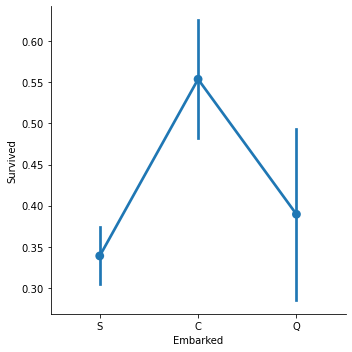

In [14]:
sns.factorplot('Embarked','Survived',data=train_data)
plt.show()

Survival Rate seems highest for passengers boarding at Port Cherbourg at around 0.55, while looks to be lowest for Southampton.

While the location of embarkation may not seem very relevant on the surface, lets examine their demographics further based on what we already know about survival chances in relation to Pclass and Gender.

In [15]:
pd.crosstab([train_data.Sex,train_data.Survived],[train_data.Embarked,train_data.Pclass],margins=True).style.background_gradient(cmap='terrain')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


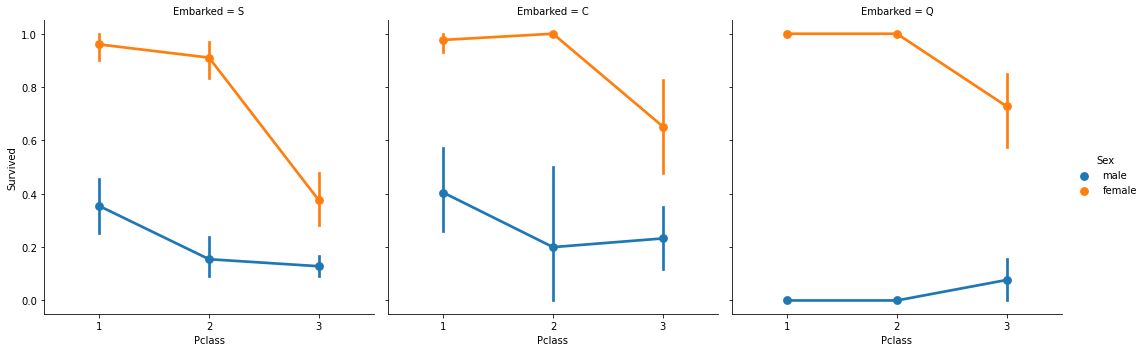

In [16]:
#Visually speaking...
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_data)
plt.show()

Frm the above cross table and factorplot, we can determine the following:

- Southampton had the most passengers from which most were in Pclass 3.

- Almost all the passengers boarding from Queenstown were in Pclass 3.

- Passengers from Cherbourg were most likely to survive. More than half of them were in Pclass 1. Guess it must be a fancy place...

Since it seems highly dependent on Pclass, we wont include it in our final model

We will also include the number of family members in our model since it seems relevant. I will be using a Logistic Regression Model and a Random Forest Model.

But first, we will create dummy variables for the categorical variables ("Pclass", "Sex", "SibSp", "Parch") so that all the factors are taken into account while creating the model.

In [17]:
#Create dummy variables

#Convert Pclass from int to objects
train_data["Pclass"]= train_data["Pclass"].astype(object) 
test_data["Pclass"]= train_data["Pclass"].astype(object) 


features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
X_test

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,0,0,0,1,0,1
1,1,0,1,0,0,1,0
2,0,0,0,0,1,0,1
3,0,0,1,0,0,0,1
4,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...
413,0,0,0,1,0,0,1
414,0,0,0,0,1,1,0
415,0,0,0,0,1,0,1
416,0,0,0,1,0,0,1


In [18]:
y = train_data["Survived"]

# Logistic Regression
LogRegression = LogisticRegression()
LogRegression.fit(X, y)
pred= LogRegression.predict(X_test)
LogRegression.score(X, y)

0.8002244668911336

In [19]:
#Random Forest

Rforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
Rforest.fit(X, y)
predictions = Rforest.predict(X_test)
Rforest.score(X, y)

0.8159371492704826

In [20]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
